# Curvilinear Interpolation using `scikit-learn`


This notebook uses examples from `scipy` documentation to demonstrate `HARK`'s `UnstructuredInterp` class.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from HARK.interpolation._sklearn import GeneralizedRegressionUnstructuredInterp
from mpl_toolkits import mplot3d

Suppose we have a collection of values for an unknown function along with their respective coordinate points. For illustration, assume the values come from the following function:


In [3]:
def func(x, y):
    return x * (1 - x) * np.cos(4 * np.pi * x) * np.sin(4 * np.pi * y**2) ** 2

The points are randomly scattered in the unit square and therefore have no regular structure.


In [4]:
rng = np.random.default_rng(0)
rand_x, rand_y = rng.random((2, 1000))
values = func(rand_x, rand_y)


Now suppose we would like to interpolate this function on a rectilinear grid, which is known as "regridding".


In [5]:
grid_x, grid_y = np.meshgrid(
    np.linspace(0, 1, 100), np.linspace(0, 1, 100), indexing="ij"
)

To do this, we use `HARK`'s `UnstructuredInterp` class. The class takes the following arguments:

- `values`: an ND-array of values for the function at the points
- `grids`: a list of ND-arrays of coordinates for the points
- `method`: the interpolation method to use, with options "nearest", "linear", "cubic" (for 2D only), and "rbf". The default is `'linear'`.


In [6]:
elastic_net_interp = GeneralizedRegressionUnstructuredInterp(
    values, (rand_x, rand_y), model="elastic-net", feature=None)
elastic_net_cv_interp = GeneralizedRegressionUnstructuredInterp(
    values, (rand_x, rand_y), model="elastic-net-cv", feature=None)
kernel_ridge_interp = GeneralizedRegressionUnstructuredInterp(
    values, (rand_x, rand_y), model="kernel-ridge", feature=None)
svr_interp = GeneralizedRegressionUnstructuredInterp(
    values, (rand_x, rand_y), model="svr", feature=None)
sgd_interp = GeneralizedRegressionUnstructuredInterp(
    values, (rand_x, rand_y), model="sgd", feature=None)
gaussian_interp = GeneralizedRegressionUnstructuredInterp(
    values, (rand_x, rand_y), model="gaussian-process", feature=None)

Once we create the interpolator objects, we can use them using the `__call__` method which takes as many arguments as there are dimensions.


In [7]:
elastic_net_grid = elastic_net_interp(grid_x, grid_y)
elastic_net_cv_grid = elastic_net_cv_interp(grid_x, grid_y)
kernel_ridge_grid = kernel_ridge_interp(grid_x, grid_y)
svr_grid = svr_interp(grid_x, grid_y)
sgd_grid = sgd_interp(grid_x, grid_y)
gaussian_grid = gaussian_interp(grid_x, grid_y)

Now we can compare the results of the interpolation with the original function. Below we plot the original function and the sample points that are known.


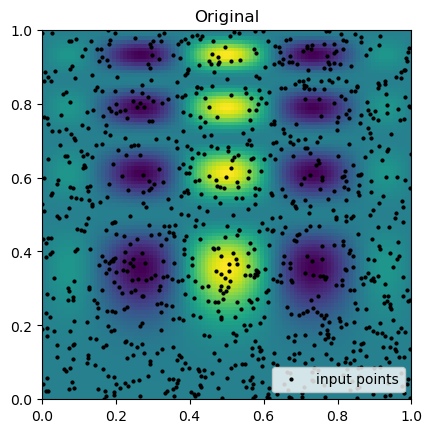

In [8]:
plt.imshow(func(grid_x, grid_y).T, extent=(0, 1, 0, 1), origin="lower")
plt.plot(rand_x, rand_y, "ok", ms=2, label="input points")
plt.title("Original")
plt.legend(loc="lower right")

Then, we can look at the result for each method of interpolation and compare it to the original function.


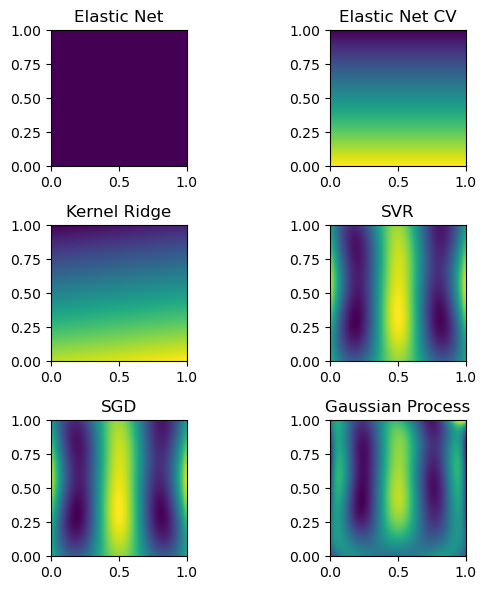

In [9]:
fig, axs = plt.subplots(3, 2, figsize=(6, 6))
titles = ["Elastic Net", "Elastic Net CV",
          "Kernel Ridge", "SVR", "SGD", "Gaussian Process"]
grids = [elastic_net_grid, elastic_net_cv_grid,
         kernel_ridge_grid, svr_grid, svr_grid, gaussian_grid]

for ax, title, grid in zip(axs.flat, titles, grids):
    im = ax.imshow(grid.T, extent=(0, 1, 0, 1), origin="lower")
    ax.set_title(title)

plt.tight_layout()
plt.show()

# Another Example


In [10]:
rng = np.random.default_rng(0)
rand_x = rng.random(20) - 0.5
rand_y = rng.random(20) - 0.5
values = np.hypot(rand_x, rand_y)
grid_x = np.linspace(min(rand_x), max(rand_x))
grid_y = np.linspace(min(rand_y), max(rand_y))
grid_x, grid_y = np.meshgrid(grid_x, grid_y)  # 2D grid for interpolation

In [11]:
elastic_net_interp = GeneralizedRegressionUnstructuredInterp(
    values, (rand_x, rand_y), model="elastic-net", feature=None)
elastic_net_cv_interp = GeneralizedRegressionUnstructuredInterp(
    values, (rand_x, rand_y), model="elastic-net-cv", feature=None)
kernel_ridge_interp = GeneralizedRegressionUnstructuredInterp(
    values, (rand_x, rand_y), model="kernel-ridge", feature=None)
svr_interp = GeneralizedRegressionUnstructuredInterp(
    values, (rand_x, rand_y), model="svr", feature=None)
sgd_interp = GeneralizedRegressionUnstructuredInterp(
    values, (rand_x, rand_y), model="sgd", feature=None)
gaussian_interp = GeneralizedRegressionUnstructuredInterp(
    values, (rand_x, rand_y), model="gaussian-process", feature=None)

In [12]:
elastic_net_grid = elastic_net_interp(grid_x, grid_y)
elastic_net_cv_grid = elastic_net_cv_interp(grid_x, grid_y)
kernel_ridge_grid = kernel_ridge_interp(grid_x, grid_y)
svr_grid = svr_interp(grid_x, grid_y)
sgd_grid = sgd_interp(grid_x, grid_y)
gaussian_grid = gaussian_interp(grid_x, grid_y)

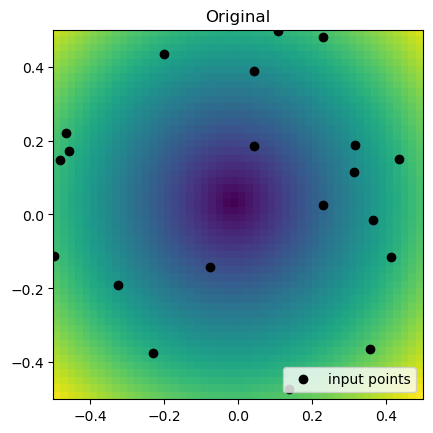

In [13]:
plt.imshow(np.hypot(grid_x, grid_y).T, extent=(-0.5, 0.5, -0.5, 0.5), origin="lower")
plt.plot(rand_x, rand_y, "ok", label="input points")
plt.title("Original")
plt.legend(loc="lower right")

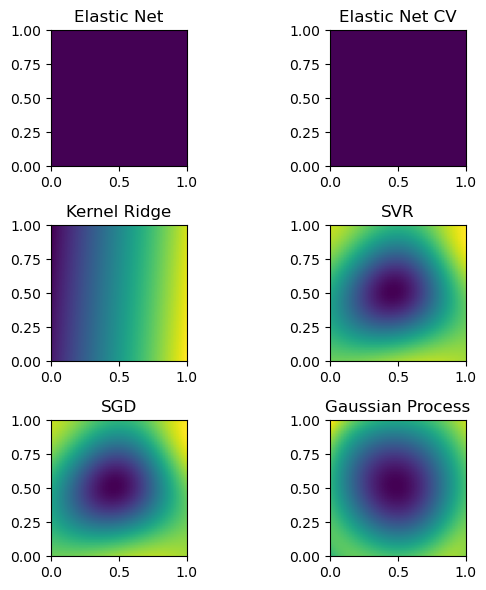

In [14]:
fig, axs = plt.subplots(3, 2, figsize=(6, 6))
titles = ["Elastic Net", "Elastic Net CV",
          "Kernel Ridge", "SVR", "SGD", "Gaussian Process"]
grids = [elastic_net_grid, elastic_net_cv_grid,
         kernel_ridge_grid, svr_grid, svr_grid, gaussian_grid]

for ax, title, grid in zip(axs.flat, titles, grids):
    im = ax.imshow(grid.T, extent=(0, 1, 0, 1), origin="lower")
    ax.set_title(title)

plt.tight_layout()
plt.show()

# Unstructured Interpolators with Rectilinear Grids


In [15]:
def F(u, v):
    return u * np.cos(u * v) + v * np.sin(u * v)

In [16]:
rand_x, rand_y = np.meshgrid(
    np.linspace(0, 3, 10), np.linspace(0, 3, 10), indexing="ij"
)
values = F(rand_x, rand_y)

In [17]:
grid_x, grid_y = np.meshgrid(
    np.linspace(0, 3, 100), np.linspace(0, 3, 100), indexing="ij"
)

In [18]:
elastic_net_interp = GeneralizedRegressionUnstructuredInterp(
    values, (rand_x, rand_y), model="elastic-net", feature=None)
elastic_net_cv_interp = GeneralizedRegressionUnstructuredInterp(
    values, (rand_x, rand_y), model="elastic-net-cv", feature=None)
kernel_ridge_interp = GeneralizedRegressionUnstructuredInterp(
    values, (rand_x, rand_y), model="kernel-ridge", feature=None)
svr_interp = GeneralizedRegressionUnstructuredInterp(
    values, (rand_x, rand_y), model="svr", feature=None)
sgd_interp = GeneralizedRegressionUnstructuredInterp(
    values, (rand_x, rand_y), model="sgd", feature=None)
gaussian_interp = GeneralizedRegressionUnstructuredInterp(
    values, (rand_x, rand_y), model="gaussian-process", feature=None)

In [19]:
elastic_net_grid = elastic_net_interp(grid_x, grid_y)
elastic_net_cv_grid = elastic_net_cv_interp(grid_x, grid_y)
kernel_ridge_grid = kernel_ridge_interp(grid_x, grid_y)
svr_grid = svr_interp(grid_x, grid_y)
sgd_grid = sgd_interp(grid_x, grid_y)
gaussian_grid = gaussian_interp(grid_x, grid_y)

Text(0.5, 1.0, 'Original')

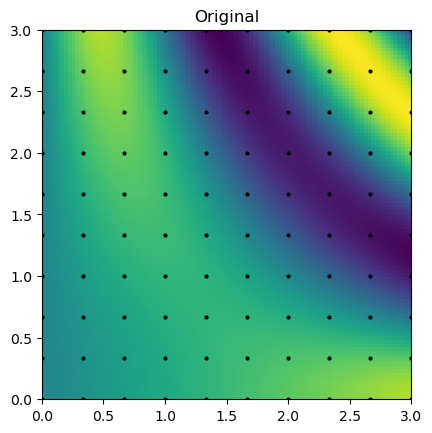

In [20]:
plt.imshow(F(grid_x, grid_y).T, extent=(0, 3, 0, 3), origin="lower")
plt.plot(rand_x, rand_y, "ok", ms=2)
plt.title("Original")

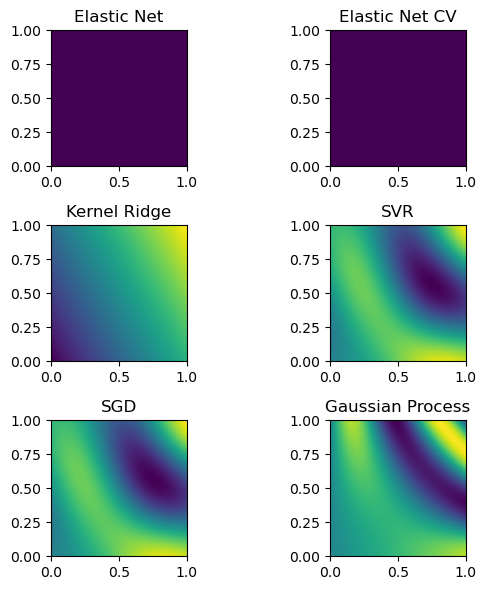

In [21]:
fig, axs = plt.subplots(3, 2, figsize=(6, 6))
titles = ["Elastic Net", "Elastic Net CV",
          "Kernel Ridge", "SVR", "SGD", "Gaussian Process"]
grids = [elastic_net_grid, elastic_net_cv_grid,
         kernel_ridge_grid, svr_grid, svr_grid, gaussian_grid]

for ax, title, grid in zip(axs.flat, titles, grids):
    im = ax.imshow(grid.T, extent=(0, 1, 0, 1), origin="lower")
    ax.set_title(title)

plt.tight_layout()
plt.show()

# More complex functions


In [22]:
def f_d(*args):
    return np.maximum(
        0.0,
        1.0
        - np.exp(0.5 - np.prod(np.asarray(args) + 0.2, axis=0) ** (1.0 / len(args))),
    )

In [23]:
rng = np.random.default_rng(0)
rand_x, rand_y = rng.random((2, 500))
values = f_d(rand_x, rand_y)

In [24]:
grid_x, grid_y = np.meshgrid(
    np.linspace(0, 1, 50), np.linspace(0, 1, 50), indexing="ij"
)

In [25]:
elastic_net_interp = GeneralizedRegressionUnstructuredInterp(
    values, (rand_x, rand_y), model="elastic-net", feature=None)
elastic_net_cv_interp = GeneralizedRegressionUnstructuredInterp(
    values, (rand_x, rand_y), model="elastic-net-cv", feature=None)
kernel_ridge_interp = GeneralizedRegressionUnstructuredInterp(
    values, (rand_x, rand_y), model="kernel-ridge", feature=None)
svr_interp = GeneralizedRegressionUnstructuredInterp(
    values, (rand_x, rand_y), model="svr", feature=None)
sgd_interp = GeneralizedRegressionUnstructuredInterp(
    values, (rand_x, rand_y), model="sgd", feature=None)
gaussian_interp = GeneralizedRegressionUnstructuredInterp(
    values, (rand_x, rand_y), model="gaussian-process", feature=None)

In [26]:
original_grid = f_d(grid_x, grid_y)
elastic_net_grid = elastic_net_interp(grid_x, grid_y)
elastic_net_cv_grid = elastic_net_cv_interp(grid_x, grid_y)
kernel_ridge_grid = kernel_ridge_interp(grid_x, grid_y)
svr_grid = svr_interp(grid_x, grid_y)
sgd_grid = sgd_interp(grid_x, grid_y)
gaussian_grid = gaussian_interp(grid_x, grid_y)

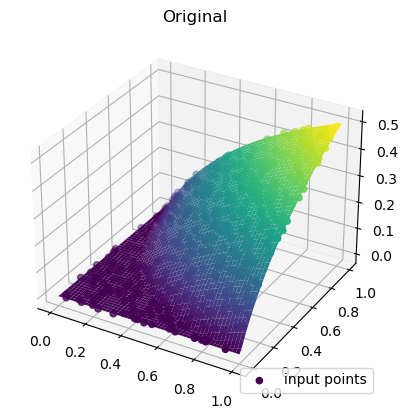

In [27]:
ax = plt.axes(projection="3d")
ax.plot_surface(
    grid_x,
    grid_y,
    original_grid,
    rstride=1,
    cstride=1,
    cmap="viridis",
    edgecolor="none",
)
ax.scatter(rand_x, rand_y, values, c=values, cmap="viridis", label="input points")
plt.title("Original")
plt.legend(loc="lower right")

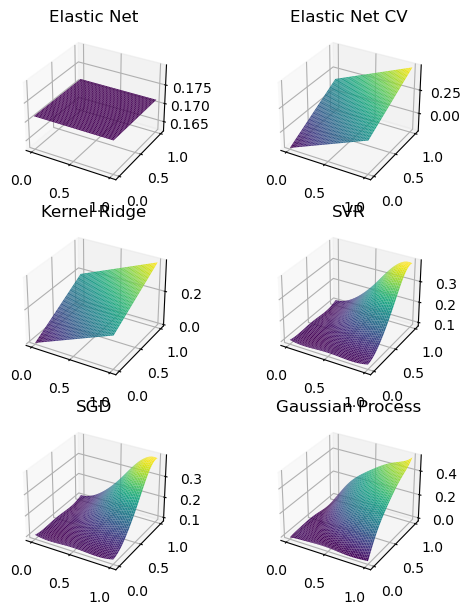

In [28]:
fig, axs = plt.subplots(3, 2, figsize=(6, 6), subplot_kw={"projection": "3d"})
titles = ["Elastic Net", "Elastic Net CV",
          "Kernel Ridge", "SVR", "SGD", "Gaussian Process"]
grids = [elastic_net_grid, elastic_net_cv_grid,
         kernel_ridge_grid, svr_grid, svr_grid, gaussian_grid]

for ax, title, grid in zip(axs.flat, titles, grids):
    im = ax.plot_surface(
        grid_x, grid_y, grid, rstride=1, cstride=1, cmap="viridis", edgecolor="none"
    )
    ax.set_title(title)

plt.tight_layout()
plt.show()

In [29]:
def f_d(x, y):
    return 1 / (np.abs(0.5 - x**4 - y**4) + 0.1)

In [30]:
rng = np.random.default_rng(0)
rand_x, rand_y = rng.random((2, 1000))
values = f_d(rand_x, rand_y)

In [31]:
grid_x, grid_y = np.meshgrid(
    np.linspace(0, 1, 100), np.linspace(0, 1, 100), indexing="ij"
)

In [32]:
elastic_net_interp = GeneralizedRegressionUnstructuredInterp(
    values, (rand_x, rand_y), model="elastic-net", feature=None)
elastic_net_cv_interp = GeneralizedRegressionUnstructuredInterp(
    values, (rand_x, rand_y), model="elastic-net-cv", feature=None)
kernel_ridge_interp = GeneralizedRegressionUnstructuredInterp(
    values, (rand_x, rand_y), model="kernel-ridge", feature=None)
svr_interp = GeneralizedRegressionUnstructuredInterp(
    values, (rand_x, rand_y), model="svr", feature=None)
sgd_interp = GeneralizedRegressionUnstructuredInterp(
    values, (rand_x, rand_y), model="sgd", feature=None)
gaussian_interp = GeneralizedRegressionUnstructuredInterp(
    values, (rand_x, rand_y), model="gaussian-process", feature="polynomial")

In [33]:
original_grid = f_d(grid_x, grid_y)
elastic_net_grid = elastic_net_interp(grid_x, grid_y)
elastic_net_cv_grid = elastic_net_cv_interp(grid_x, grid_y)
kernel_ridge_grid = kernel_ridge_interp(grid_x, grid_y)
svr_grid = svr_interp(grid_x, grid_y)
sgd_grid = sgd_interp(grid_x, grid_y)
gaussian_grid = gaussian_interp(grid_x, grid_y)

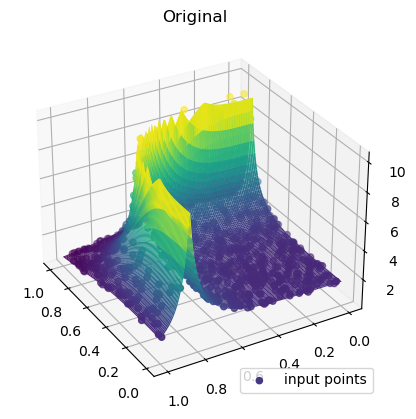

In [34]:
ax = plt.axes(projection="3d")
ax.plot_surface(
    grid_x,
    grid_y,
    original_grid,
    rstride=1,
    cstride=1,
    cmap="viridis",
    edgecolor="none",
)
ax.scatter(rand_x, rand_y, values, c=values, cmap="viridis", label="input points")
ax.view_init(30, 150)
plt.title("Original")
plt.legend(loc="lower right")

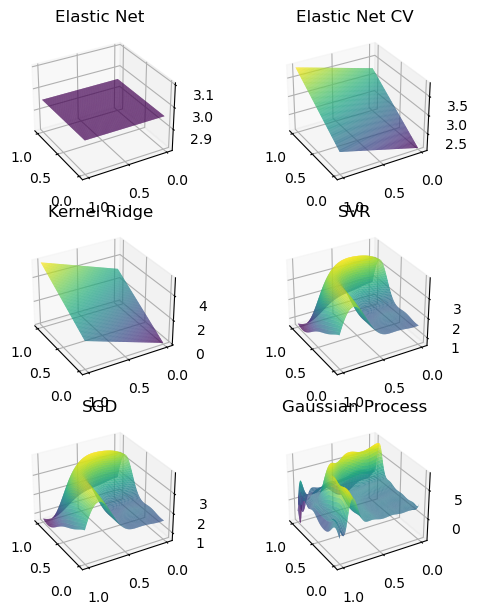

In [35]:
fig, axs = plt.subplots(3, 2, figsize=(6, 6), subplot_kw={"projection": "3d"})
titles = ["Elastic Net", "Elastic Net CV",
          "Kernel Ridge", "SVR", "SGD", "Gaussian Process"]
grids = [elastic_net_grid, elastic_net_cv_grid,
         kernel_ridge_grid, svr_grid, svr_grid, gaussian_grid]

for ax, title, grid in zip(axs.flat, titles, grids):
    im = ax.plot_surface(
        grid_x, grid_y, grid, rstride=1, cstride=1, cmap="viridis", edgecolor="none"
    )
    ax.set_title(title)
    ax.view_init(30, 150)

plt.tight_layout()
plt.show()